In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dir = 'D:/cash rec/nrs/data/train'
test_dir = 'D:/cash rec/nrs/data/test'
validation_dir = 'D:/cash rec/nrs/data/test'

In [4]:
image_w = 128
image_h = 128

channels, output = 3,3

In [5]:
cat = {
    '0':"50",
    '1':"100",
    '2':"10"
    
}

In [6]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (image_w,image_h),
                                             batch_size=20,
                                            shuffle=True,
                                             class_mode='categorical')

Found 99 images belonging to 3 classes.


In [7]:
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size= (image_w,image_h),
                                             batch_size=20,
                                             shuffle=True,
                                             class_mode='categorical')

Found 26 images belonging to 3 classes.


In [8]:
augmented_images = [train_generator[0][0][0] for i in range(5)]


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

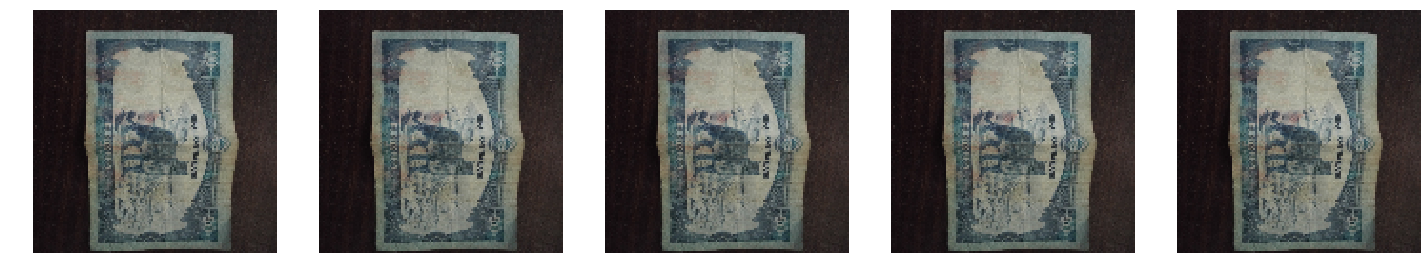

In [10]:
plotImages(augmented_images)

In [11]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 26 images belonging to 3 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
EPOCHS = 8
train_sample = train_generator.samples
validation_sample = validation_generator.samples
test_sample = test_generator.samples

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [15]:
batch_size = train_generator.batch_size

In [16]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:

history = model.fit_generator(train_generator,
                    steps_per_epoch = train_sample//batch_size,
                    epochs = EPOCHS,
                    validation_data = validation_generator,
                    validation_steps = validation_sample//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
4/4 [==============================] - 26s 7s/step - loss: 4.6827 - acc: 0.4750 - val_loss: 4.6925 - val_acc: 0.2692
Epoch 2/8
4/4 [==============================] - 25s 6s/step - loss: 6.6266 - acc: 0.4183 - val_loss: 2.2669 - val_acc: 0.4615
Epoch 3/8
4/4 [==============================] - 22s 5s/step - loss: 1.1678 - acc: 0.6830 - val_loss: 1.1711 - val_acc: 0.5385
Epoch 4/8
4/4 [==============================] - 25s 6s/step - loss: 0.6703 - acc: 0.7854 - val_loss: 1.2263 - val_acc: 0.5000
Epoch 5/8
4/4 [==============================] - 25s 6s/step - loss: 0.6444 - acc: 0.7603 - val_loss: 0.9514 - val_acc: 0.6923
Epoch 6/8
4/4 [==============================] - 24s 6s/step - loss: 0.4325 - acc: 0.9125 - val_loss: 0.9251 - val_acc: 0.6538
Epoch 7/8
4/4 [==============================] - 23s 6s/step - loss: 0.2606 - acc: 0.9243 - val_loss: 1.7313 - val_acc: 0.5769
Epoch 8/8
4/4 [==============================] - 24s 6s/step - 

In [18]:
model.save_weights('modelnrs.h5')

In [19]:
img = load_img('D:/cash rec/nrs/data/test/hundred/hundred.9.jpg',target_size=(image_w,image_h))

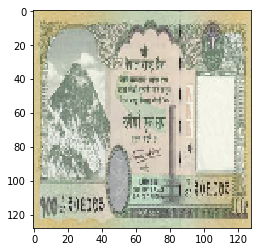

In [20]:
plt.imshow(img)

In [21]:
img = np.array(img)/255

In [22]:
img = img.reshape(1, 128, 128, 3)

In [23]:
pred = model.predict(img)

In [24]:
pred

array([[0.39843187, 0.42540935, 0.17615874]], dtype=float32)

In [25]:
p = str(np.argmax(pred))
cat[p]

'100'

In [26]:
img = load_img('D:/cash rec/nrs/data/test/fifty/fifty.5.jpg',target_size=(image_w,image_h))

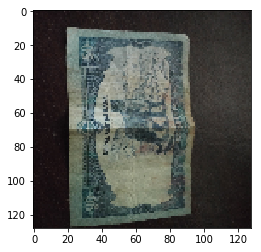

In [27]:
plt.imshow(img)

In [28]:
img = np.array(img)/255
img = img.reshape(1, 128, 128, 3)
pred = model.predict(img)
np.argmax(pred)
p = str(np.argmax(pred))
cat[p]

'50'

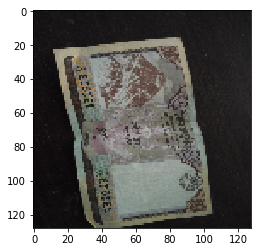

In [29]:
img = load_img('D:/cash rec/nrs/data/test/ten/ten.10.jpg',target_size=(image_w,image_h))
plt.imshow(img)

In [30]:
img = np.array(img)/255
img = img.reshape(1, 128, 128, 3)
pred = model.predict(img)
p = str(np.argmax(pred))
cat[p]

'10'